<a href="https://colab.research.google.com/github/fajarkarim/dskola-home-credit/blob/fian-iseng/AnalyzeHomeCredit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Library

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats



In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Load Dataset

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
homecredit_column_description = "/content/gdrive/MyDrive/Digitalskola/Dataset/HomeCredit/HomeCredit_columns_description.csv"
homecredit_train_data = "/content/gdrive/MyDrive/Digitalskola/Dataset/HomeCredit/application_train.csv"
column_description = pd.read_csv(homecredit_column_description,  encoding= 'unicode_escape')
homecredit_df = pd.read_csv(homecredit_train_data)

homecredit_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.00,406597.50,24700.50,351000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.02,-9461,-637,-3648.00,-2120,nan,1,1,0,1,1,0,Laborers,1.00,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.02,0.02,0.00,0.00,reg oper account,block of flats,0.01,"Stone, brick",No,2.00,2.00,2.00,2.00,-1134.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,1.00
1,100003,0,Cash loans,F,N,N,0,270000.00,1293502.50,35698.50,1129500.00,Family,State servant,Higher education,Married,House / apartment,0.00,-16765,-1188,-1186.00,-291,nan,1,1,0,1,1,0,Core staff,2.00,1,1,MONDAY,11,0,0,0,0,0,0,...,0.08,0.06,0.00,0.01,reg oper account,block of flats,0.07,Block,No,1.00,0.00,1.00,0.00,-828.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
2,100004,0,Revolving loans,M,Y,Y,0,67500.00,135000.00,6750.00,135000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.01,-19046,-225,-4260.00,-2531,26.00,1,1,1,1,1,0,Laborers,1.00,2,2,MONDAY,9,0,0,0,0,0,0,...,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-815.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00
3,100006,0,Cash loans,F,N,Y,0,135000.00,312682.50,29686.50,297000.00,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.01,-19005,-3039,-9833.00,-2437,nan,1,1,0,1,0,0,Laborers,2.00,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,2.00,0.00,2.00,0.00,-617.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,nan,nan,nan,nan,nan,nan
4,100007,0,Cash loans,M,N,Y,0,121500.00,513000.00,21865.50,513000.00,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.03,-19932,-3038,-4311.00,-3458,nan,1,1,0,1,0,0,Core staff,1.00,2,2,THURSDAY,11,0,0,0,0,1,1,...,nan,nan,nan,nan,NaN,NaN,nan,NaN,NaN,0.00,0.00,0.00,0.00,-1106.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
bad_performance_loan = homecredit_df[homecredit_df['TARGET'] == 1]
good_performance_loan = homecredit_df[homecredit_df['TARGET'] == 0]

# Analyze bad loan data


## Check AMT_INCOME_TOTAL

In [ ]:
bad_performance_loan.shape

(24825, 122)

In [ ]:
good_performance_loan.shape

(282686, 122)

In [ ]:
bad_performance_loan['AMT_INCOME_TOTAL'].describe()

count       24825.00
mean       165611.76
std        746676.96
min         25650.00
25%        112500.00
50%        135000.00
75%        202500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [ ]:
bad_performance_loan.drop([''])

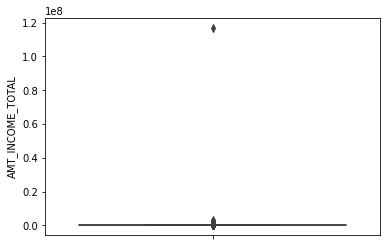

In [ ]:
sns.boxplot(y=bad_performance_loan['AMT_INCOME_TOTAL'])

In [ ]:
bad_performance_loan[bad_performance_loan['AMT_INCOME_TOTAL'] > 100000000].filter(['SK_ID_CURR']).count()

SK_ID_CURR    1
dtype: int64

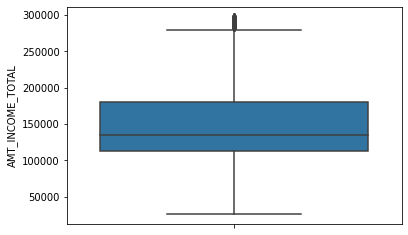

In [ ]:
synthize_bad_loan = bad_performance_loan[bad_performance_loan['AMT_INCOME_TOTAL'] < 300000]
sns.boxplot(y=synthize_bad_loan['AMT_INCOME_TOTAL'])

In [ ]:
synthize_bad_loan['AMT_INCOME_TOTAL'].count()

23472

**NOTE**: Remove outlier of AMT_INCOME_TOT

## Check AMT_CREDIT

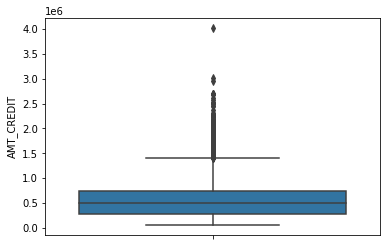

In [ ]:
sns.boxplot(y=bad_performance_loan['AMT_CREDIT'])

In [ ]:
bad_performance_loan['AMT_CREDIT'].describe()

count     24825.00
mean     557778.53
std      346433.24
min       45000.00
25%      284400.00
50%      497520.00
75%      733315.50
max     4027680.00
Name: AMT_CREDIT, dtype: float64

In [ ]:
q_low = bad_performance_loan['AMT_CREDIT'].quantile(0.01)
q_high = bad_performance_loan['AMT_CREDIT'].quantile(0.99)

bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan = bad_performance_loan[(bad_performance_loan['AMT_CREDIT'] > q_low) & (bad_performance_loan['AMT_CREDIT'] < q_high)]

In [ ]:
total_count_bad_loan = bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan['AMT_CREDIT'].count()
type(total_count_bad_loan)

numpy.int64

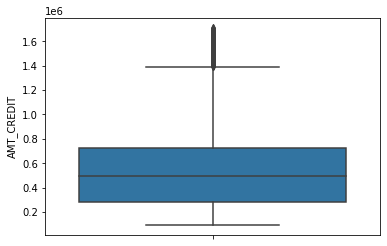

In [ ]:
sns.boxplot(y=bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan['AMT_CREDIT'])

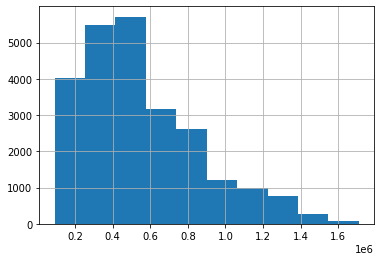

In [ ]:
bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan['AMT_CREDIT'].hist()

In [ ]:
bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan.groupby('NAME_INCOME_TYPE')['TARGET'].count()/total_count_bad_loan

NAME_INCOME_TYPE
Commercial associate   0.22
Maternity leave        0.00
Pensioner              0.12
State servant          0.05
Unemployed             0.00
Working                0.61
Name: TARGET, dtype: float64

In [ ]:
bad_loan_family_status_stat = bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan.groupby('NAME_FAMILY_STATUS')['TARGET'].count()/total_count_bad_loan


NAME_FAMILY_STATUS
Civil marriage         0.12
Married                0.60
Separated              0.07
Single / not married   0.18
Widow                  0.04
Name: TARGET, dtype: float64

In [ ]:
gender_statistic = bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan.groupby('CODE_GENDER')['TARGET'].count()/total_count_bad_loan

In [ ]:
gender_statistic

CODE_GENDER
F   0.57
M   0.43
Name: TARGET, dtype: float64

In [ ]:
bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan.groupby(['FLAG_OWN_REALTY', 'FLAG_OWN_CAR'])['TARGET'].count()/total_count_bad_loan

FLAG_OWN_REALTY  FLAG_OWN_CAR
N                N              0.22
                 Y              0.09
Y                N              0.47
                 Y              0.21
Name: TARGET, dtype: float64

In [ ]:
bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan.groupby('OCCUPATION_TYPE')['TARGET'].count()/total_count_bad_loan

OCCUPATION_TYPE
Accountants             0.02
Cleaning staff          0.02
Cooking staff           0.03
Core staff              0.07
Drivers                 0.09
HR staff                0.00
High skill tech staff   0.03
IT staff                0.00
Laborers                0.24
Low-skill Laborers      0.01
Managers                0.05
Medicine staff          0.02
Private service staff   0.01
Realty agents           0.00
Sales staff             0.12
Secretaries             0.00
Security staff          0.03
Waiters/barmen staff    0.01
Name: TARGET, dtype: float64

In [ ]:
bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan.groupby('ORGANIZATION_TYPE')['TARGET'].count()/total_count_bad_loan

ORGANIZATION_TYPE
Advertising              0.00
Agriculture              0.01
Bank                     0.01
Business Entity Type 1   0.02
Business Entity Type 2   0.04
Business Entity Type 3   0.25
Cleaning                 0.00
Construction             0.03
Culture                  0.00
Electricity              0.00
Emergency                0.00
Government               0.03
Hotel                    0.00
Housing                  0.01
Industry: type 1         0.00
Industry: type 10        0.00
Industry: type 11        0.01
Industry: type 12        0.00
Industry: type 13        0.00
Industry: type 2         0.00
Industry: type 3         0.01
Industry: type 4         0.00
Industry: type 5         0.00
Industry: type 6         0.00
Industry: type 7         0.00
Industry: type 8         0.00
Industry: type 9         0.01
Insurance                0.00
Kindergarten             0.02
Legal Services           0.00
Medicine                 0.03
Military                 0.01
Mobile                

In [ ]:
bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan['DEBT_TO_CREDIT_RATIO'] = bad_perfromance_loan_with_normalized_amt_creditbad_performance_loan['AMT_INCOME_TOTAL']

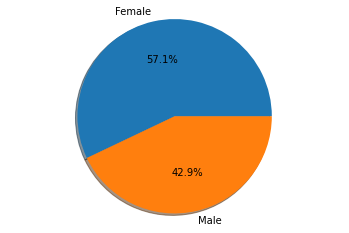

In [ ]:
labels = ['Female', 'Male']
sizes = [gender_statistic[0], gender_statistic[1]]
# print(sizes) # adds up to 1433, which is the total number of participants
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()


# Build table with several columns from hypotesis


In [ ]:
main_columns = [
                'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 
                'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'REGION_POPULATION_RELATIVE', 
                'DAYS_BIRTH', 'DAYS_EMPLOYED', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
                'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'ORGANIZATION_TYPE'
              ]

  
documents_columns = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 
                    'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15',
                    'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
                    ]




# Check missing and duplicate data

In [ ]:
null_fields_count = homecredit_df.isnull().sum()
null_fields_count.shape

NameError: ignored

In [ ]:
homecredit_df.dropna().reset_index()

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,71,100083,0,Cash loans,M,Y,Y,0,103500.0,573628.5,24435.0,463500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.009657,-15406,-892,-341.0,-4176,22.0,1,1,0,1,0,0,Laborers,2.0,2,2,MONDAY,18,0,0,0,0,0,...,0.1214,0.0949,0.0000,0.0000,reg oper account,block of flats,0.1324,"Stone, brick",No,2.0,1.0,2.0,1.0,-2053.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
1,124,100145,0,Cash loans,F,Y,Y,1,202500.0,260725.5,16789.5,198000.0,Family,Working,Secondary / secondary special,Separated,House / apartment,0.018850,-16282,-4375,-762.0,-1494,8.0,1,1,0,1,0,0,Laborers,2.0,2,2,TUESDAY,11,0,0,0,0,0,...,0.0770,0.0919,0.0000,0.0000,reg oper spec account,block of flats,0.0710,Panel,No,6.0,0.0,6.0,0.0,-1782.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,152,100179,0,Cash loans,F,Y,N,0,202500.0,675000.0,53329.5,675000.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.031329,-11375,-2311,-180.0,-2009,4.0,1,1,0,1,0,0,Managers,2.0,2,2,MONDAY,13,0,0,0,0,0,...,0.4361,0.7317,0.2213,0.7892,reg oper account,block of flats,0.7334,Monolithic,No,0.0,0.0,0.0,0.0,-1792.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
3,161,100190,0,Cash loans,M,Y,N,0,162000.0,263686.5,24781.5,238500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.022625,-13972,-4472,-464.0,-4529,3.0,1,1,0,1,1,0,Laborers,2.0,2,2,THURSDAY,16,0,0,0,0,0,...,0.2565,0.3628,0.0000,0.0172,reg oper account,block of flats,0.4064,Panel,No,5.0,0.0,5.0,0.0,-1161.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,255,100295,1,Cash loans,M,Y,N,1,225000.0,1019205.0,31032.0,774000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-11356,-602,-335.0,-3224,9.0,1,1,0,1,0,0,Laborers,2.0,1,1,MONDAY,14,1,0,1,0,0,...,0.1975,0.2310,0.0078,0.0077,reg oper account,block of flats,0.1874,Panel,No,3.0,0.0,3.0,0.0,-14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,0.0,0.0,6.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8597,307358,456083,0,Cash loans,F,Y,Y,2,112500.0,361462.5,16051.5,274500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Marrie

In [ ]:
homecredit_df.duplicated().sum()

0

In [ ]:
homecredit_df.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

# Check Distribution in Data

cek mean, median, outliers

# Check correlation between field

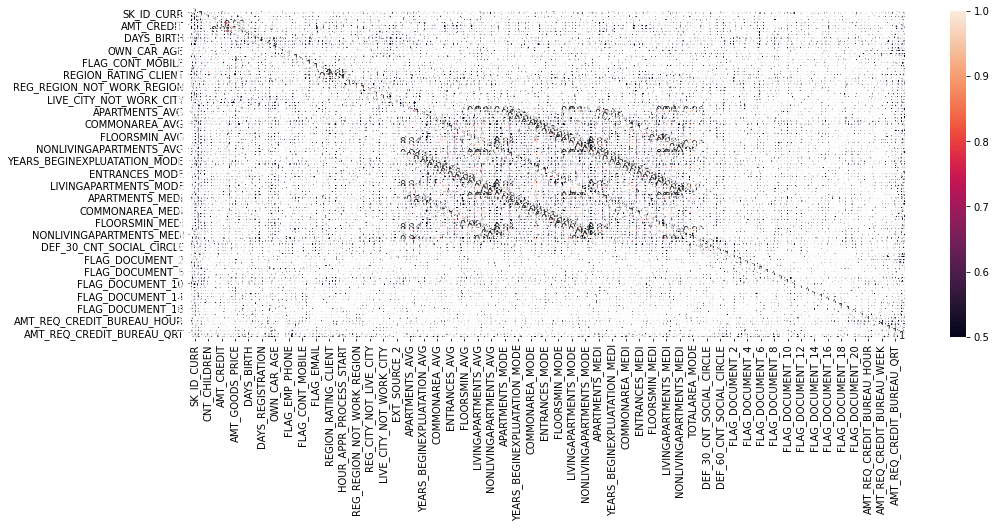

In [ ]:
plt.figure(figsize=(16, 6))

sns.heatmap(homecredit_df.corr(), vmin=0.5, vmax=1, annot=True)
